In [288]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [289]:
#Reading CSV to DataFrame
filepath = 'Resources/indeed_jobs.csv'

df = pd.read_csv(filepath, header=None).drop(0, axis=1)
df.head()

,1,2,3,4,5
0,Junior Investment Data Analyst,ACR Alpine Capital Research,JOB TITLE: Junior Investment Data Analyst Loca...,www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0AS...,20220121
1,Sports Gaming Data Entry Analyst,Sports Gaming Technology Firm,"Sports Gaming Data Entry Analyst in Arlington,...",www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0Cn...,20220121
2,Workforce Data Analyst,California Public Employees' Retirement System...,The California Public Employees’ Retirement Sy...,www.indeed.com/company/California-Public-Emplo...,20220121
3,Data Analyst,PC Matic,"PC Matic, a leading cybersecurity company that...",www.indeed.com/company/PC-Matic/jobs/Data-Anal...,20220121
4,Data Analyst 2,PayPal,"Who we are: At PayPal (NASDAQ: PYPL), we belie...",www.indeed.com/rc/clk?jk=76ad377b677f0b5c&fcci...,20220121


#### Cleaning Data

In [290]:
#Separate description from dataframe
job_description = df[3]
job_description = [item for item in job_description]
single_job = job_description[1].replace("-", " ").replace("/", " ")

In [291]:
#Remove market tickers form job descrip
text = re.sub("\$", " ", single_job)
text = text.replace(':', " ")

#Remove puncutation
punct = set(string.punctuation)
text = "".join([char for char in text if char not in punct])

### Filtering Job Description and Tokenize Words

In [292]:
#Remove stopwords from job descrip
job_stopwords = ['responsibilities','skills','job','types',
    'fulltime','contract','pay', 'per','year','benefits','schedule','supplemental',
    'work','location','multiple','locations','configuration','specifications',
     'hour','shift','monday','friday','bonus','pay', 'recommendations', 'insurance', 
     'dental', 'requirement', 'requirements', 'employee','assistance', 'program', 'health', 'parental', 
     'leave', 'relocation', 'vision', 'parental', 'health', 'professional', 'development', '401k', 
     'matching', 'flexible', 'savings', 'account', 'life', 'paid', 'time', 'weekend', 'availability', 'must', 
     'able',
]

stop_words = nltk.corpus.stopwords.words('english')
word_tokens = word_tokenize(text)
filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words] 
final_job_filtered = [word.lower() for word in filtered_sentence if not word.lower() in job_stopwords and not word.isdigit()]


In [293]:
#Place tokensized words into dataframe
job_count = Counter(final_job_filtered)
job_df = pd.DataFrame.from_dict(job_count, orient='index').reset_index().drop_duplicates()

### Filtering Resume and Tokenizing Words

In [294]:
user_input = input("Please copy and paste your resume here!").replace("-", " ").replace("/", " ")

In [295]:
#Remove market tickers from resume
user_text = re.sub("\$", " ", user_input)
user_text = user_text.replace(':', " ")

#Remove puncutation
punct = set(string.punctuation)
user_text = "".join([char for char in user_text if char not in punct])
user_text

#Remove stopwords from resume
resume_stopwords = ['responsibilities','skills','job','types',
    'fulltime','contract','pay', 'per','year','benefits','schedule','supplemental',
    'work','location','multiple','locations','configuration','specifications',
     'hour','shift','monday','friday','bonus','pay', 'recommendations', 'insurance', 
     'dental', 'requirement', 'requirements', 'employee','assistance', 'program', 'health', 'parental', 
     'leave', 'relocation', 'vision', 'parental', 'health', 'professional', 'development', '401k', 
     'matching', 'flexible', 'savings', 'account', 'life', 'paid', 'time', 'weekend', 'availability', 'must', 
     'able', '●', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'san', 'diego', 'ca'
     
]

stop_words = nltk.corpus.stopwords.words('english')
user_tokens = word_tokenize(user_text)
filtered_resume = [w.lower() for w in user_tokens if not w.lower() in stop_words] 
final_resume_filter = [word.lower() for word in filtered_resume if not word.lower() in resume_stopwords and not word.isdigit()]
final_resume_filtered = [word for word in final_resume_filter if word.find('github')]

In [296]:
#Separating columns into lists to use in for loop
resume_count = Counter(final_resume_filtered)
resume_df = pd.DataFrame.from_dict(resume_count, orient='index').reset_index().drop_duplicates()
resume_words = list(resume_df['index'])

In [297]:
#Loop through job_count and append words found inside and outside resume
inside_resume = []
outside_resume = []
for key, value in job_count.items():
    if key in resume_words:
        item = {'word inside resume': key, 'frequency in job description': value}
        inside_resume.append(item)   
    else:
       item = {'word outside resume':key, 'frequency in job description':value}
       outside_resume.append(item)

In [298]:
#Value represent the freqency of key in job count NOT resume count
#Sort words IN resume and IN Job Description by Desc
inside_df = pd.DataFrame(inside_resume)
inside_df.head()

,word inside resume,frequency in job description
0,data,3
1,role,2
2,focused,1
3,excellent,3
4,education,1


In [299]:
resume_count = Counter(final_resume_filtered)
word_inside_resume = list(inside_df["word inside resume"])
new_inside_resume = []
for key, value in resume_count.items():
    if key in word_inside_resume:
        item = {'word inside resume': key, 'frequency in resume': value}
        new_inside_resume.append(item)


In [300]:
#Final dataframe of Word frequencies in Job description and Word frequencies in Resume
nir_df = pd.DataFrame(new_inside_resume)
final_resume_job_count_df = pd.merge(inside_df, nir_df, on=["word inside resume"])
final_resume_job_count_df

,word inside resume,frequency in job description,frequency in resume
0,data,3,11
1,role,2,5
2,focused,1,2
3,excellent,3,1
4,education,1,1
5,documentation,1,1
6,using,1,1
7,record,2,1
8,client,1,1
9,take,1,1


In [301]:
#Value represent the freqency of key in job count NOT resume count
#Sort words in NOT in resume but in Job Description by Desc
outside_df = pd.DataFrame(outside_resume)
outside_df.sort_values(by='frequency in job description', ascending=False)

,word outside resume,frequency in job description
1,gaming,7
0,sports,4
45,environment,4
2,entry,3
3,analyst,3
...,...,...
47,45k,1
46,shifts,1
44,hybrid,1
43,one,1


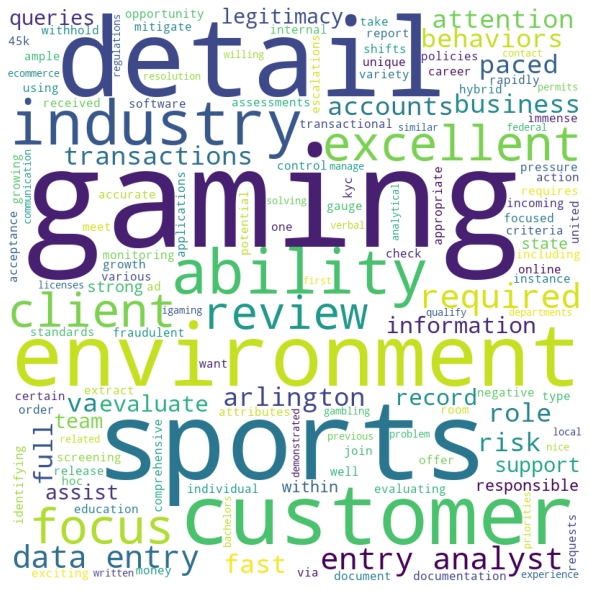

In [302]:
#WordCloud to Visualize Frequency of Word in Job Description
final_job_filtered_sentence = " ".join(final_job_filtered)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(final_job_filtered_sentence)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

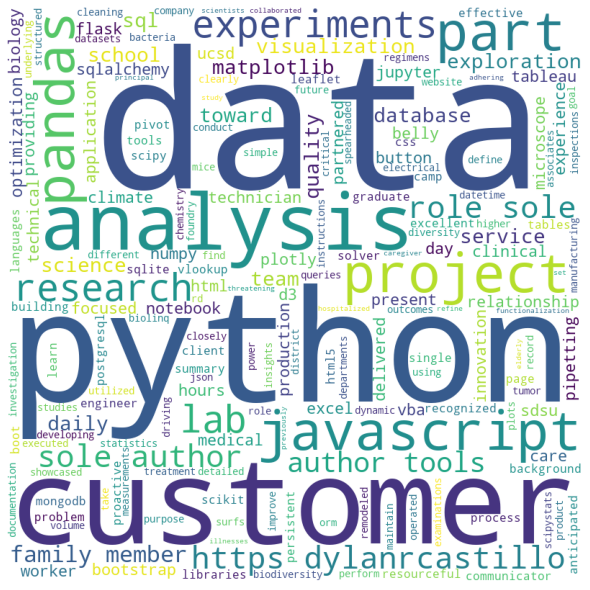

In [303]:
#WordCloud to Visualize Frequency of Words in Resume
resume_filtered_sentence = ' '.join(final_resume_filtered)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(resume_filtered_sentence)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 